In [15]:
import pandas as pd
import numpy as np
import requests
from PIL import Image
from io import BytesIO
import cv2
import urllib
from matplotlib import pyplot as plt


In [9]:
filepath = "../datasets/oxford_hic/"
filename = "oxford_hic_data.csv"
image_path = "oxford_hic_image_info.csv"

df = pd.read_csv(filepath+filename)
df.head(5)
images = pd.read_csv(filepath+image_path)
images.head(5)


C:\Users\Borodum\AppData\Local\Temp\ipykernel_22100\4197423463.py:5: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath+filename)


,image_id,image_url
0,bokete_0,https://d13n9ry8xcpemi.cloudfront.net/photo/od...
1,bokete_1,https://d13n9ry8xcpemi.cloudfront.net/photo/od...
2,bokete_2,https://d13n9ry8xcpemi.cloudfront.net/photo/od...
3,bokete_3,https://d13n9ry8xcpemi.cloudfront.net/photo/od...
4,bokete_4,https://d13n9ry8xcpemi.cloudfront.net/photo/od...


In [20]:
df.head(5)


,image_id,caption,funny_score
0,bokete_0,My driver's license photo,0.0
1,bokete_1,Refugee relief.,0.0
2,bokete_2,Now! I think I stepped on a cat! What? Really?...,0.0
3,bokete_3,You wouldn't know I was reading a comic book.,0.0
4,bokete_4,"Oh no! I forgot my ・・・・ clothes!""",0.0


In [64]:
def showInRow(list_of_images, titles = None, disable_ticks = False):
  count = len(list_of_images)
  for idx in range(count):
    subplot = plt.subplot(1, count, idx+1)
    if titles is not None:
      subplot.set_title(titles[idx])

    img = list_of_images[idx]
    cmap = 'gray' if (len(img.shape) == 2 or img.shape[2] == 1) else None
    subplot.imshow(img, cmap=cmap)
    if disable_ticks:
      plt.xticks([]), plt.yticks([])
  plt.show()

def get_img_from_url(url):
    response = requests.get(url)
    image_bytes = np.asarray(bytearray(response.content), dtype=np.uint8)
    img = cv2.imdecode(image_bytes, cv2.IMREAD_COLOR)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

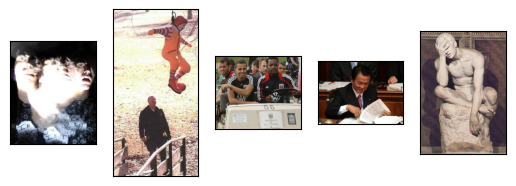

In [25]:
sample_img = []
for url in images['image_url'][:5]:
    response = requests.get(url)
    image_bytes = np.asarray(bytearray(response.content), dtype=np.uint8)
    img = cv2.imdecode(image_bytes, cv2.IMREAD_COLOR)
    sample_img.append(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

showInRow(sample_img, disable_ticks=True)

In [ ]:
s = set()
for elem in df['funny_score']:
    if type(elem) == str:
        s.add(elem)
print(s)
print(type(df['funny_score'][0]))


{'481', '2,163', '68', '1,193', '2,786', '415', '26', '324', '5,222', '1,139', '465.0', '763', '148', '1,036', '767', '454', '2,122', '610', '53.0', '58', '782', '21.0', '686', '996', '548', '423', '402', '309.0', '901', '781', '124', '535', '711', '159.0', '1,823', '135.0', '1,250', '1,980', '1,084', '1093', '364', '761', '278', '578', '580', '5,026', '89', '4,382', '357', '482', '289', '1,553', '40', '586.0', '102.0', '690', '1,821', '723', '594', '2,307', '277', '16.0', '428', '727', '125.0', '163', '8', '21', '72', '823', '884', '168', '233', '5,332', '1,548', '190', '1,053', '1,530', '460', '1,411', '3,492', '339', '176', '467', '3,169', '66,966', '12.0', '28.0', '499', '698', '637', '624', '479', '276', '653', '356', '2,680', '792', '3,164', '82,860', '1,043', '447', '2,486', '700', '317', '1,691', '171', '195', '55', '1,281', '534', '194', '829', '12', '1,478', '184', '886', '55.0', '522', '4,235', '7,539', '684', '105.0', '43.0', '2,215', '1,316', '210', '135', '542', '114', '3

In [36]:
df_dropped = df[df['funny_score'].apply(lambda x: isinstance(x, int))].copy()

df_cleaned = df[df['funny_score'].apply(lambda x: isinstance(x, str))].copy()

# Clean the string values and cast to int
df_cleaned['funny_score'] = (
    df_cleaned['funny_score']
    .str.replace(',', '', regex=False)  # remove commas
    .str.replace('.0', '', regex=False) # remove trailing .0
    .astype(int)
)
df_final = pd.concat([df_dropped, df_cleaned], ignore_index=False).sort_index()
df_final.head(5)

,image_id,caption,funny_score
0,bokete_0,My driver's license photo,0
1,bokete_1,Refugee relief.,0
2,bokete_2,Now! I think I stepped on a cat! What? Really?...,0
3,bokete_3,You wouldn't know I was reading a comic book.,0
4,bokete_4,"Oh no! I forgot my ・・・・ clothes!""",0


In [40]:
df_funny = df_final.sort_values(by="funny_score")[::-1]
df_funny.head(5)

,image_id,caption,funny_score
1299162,bokete_100219,Listen to me. Listen to me. It's a relief that...,98148
1368294,bokete_103390,Here comes the money-free users.,97638
1424500,bokete_106922,When we turned in our assignments for the summ...,91873
1299442,bokete_100225,It's... it's melon.,90692
1217774,bokete_96112,I'm going to the second meeting!,88027


Listen to me. Listen to me. It's a relief that you're hitting.


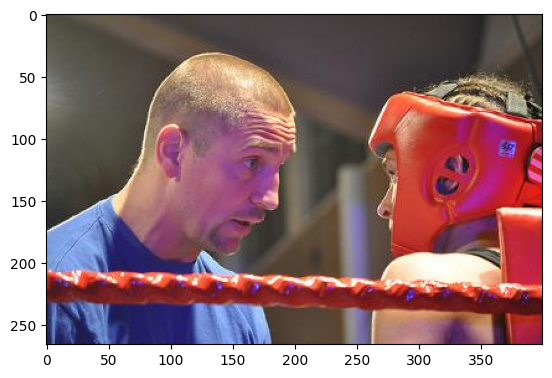

Here comes the money-free users.


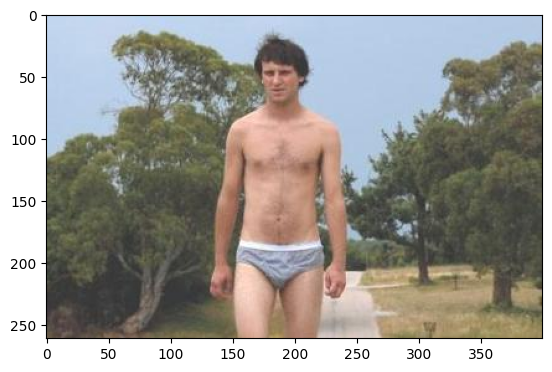

When we turned in our assignments for the summer vacation, everyone started to hand in homework they didn't know.


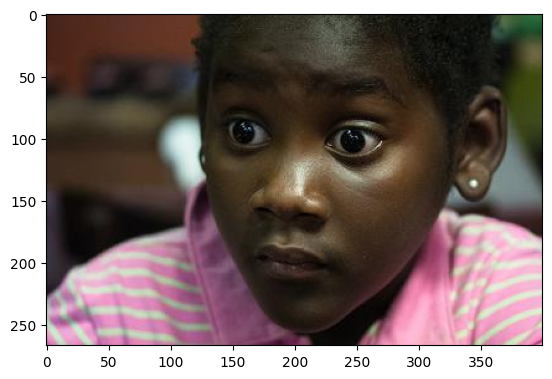

It's... it's melon.


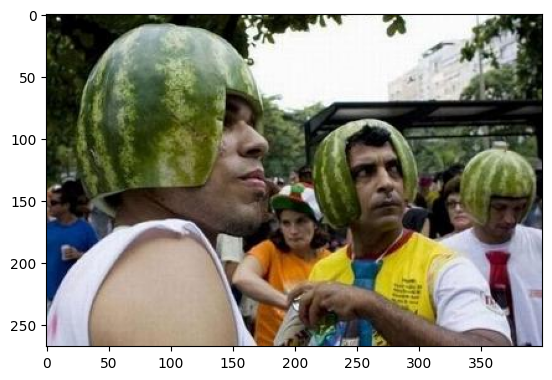

I'm going to the second meeting!


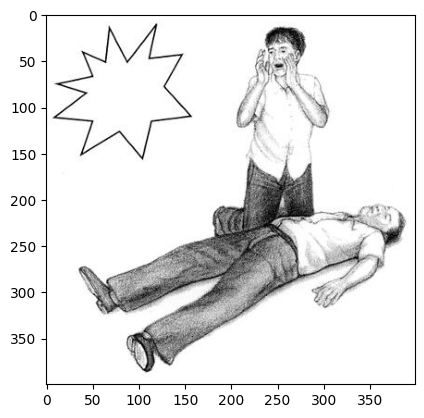

In [65]:
for image_id, caption in zip(df_funny['image_id'][:5], df_funny['caption'][:5]):
    url = images.loc[images['image_id'] == image_id].iloc[0]['image_url']
    print(caption)
    img = get_img_from_url(url=url)
    showInRow([img])
